# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import json

# Import API key
from pprint import pprint
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Couter for print log
record_counter = 0
set_counter = 1

# Dash for F string
dash = ("-")*35

# Creating empty list for the 8 different variables 
cloud, country, date, humidity, lat, lng, max_temp, wind_speed = ([] for i in range (8))

# F string to print the beginning of the print log
print(f"{dash}\nBeginning Data Retrieval\n{dash}")

# Forloop to append various values retrieved from openweathermap
for city in cities:

# Start of the print log counter
    record_counter = record_counter + 1

# Append extracted json values to their corresponding lists 
    try:
        response = requests.get(query_url + city).json()
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {city.title()}")

# If statement to reset counters        
        if record_counter == 50:
            record_counter = 0
            set_counter = set_counter + 1

# Exception Handling for when values do not exist
    except:
        record_counter = record_counter - 1
        cloud.append("NaN")
        country.append("NaN")
        date.append("NaN")
        humidity.append("NaN")
        lat.append("NaN")
        lng.append("NaN")
        max_temp.append("NaN")
        wind_speed.append("NaN")
        print("City not found. Skipping...")

# F string to print the ending of the print log        
print(f"{dash}\nData Retrieval Complete\n{dash}")

-----------------------------------
Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | Kapaa
Processing Record 2 of Set 1 | Punta Arenas
Processing Record 3 of Set 1 | Mataura
Processing Record 4 of Set 1 | New Norfolk
Processing Record 5 of Set 1 | Puerto Madryn
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Huarmey
City not found. Skipping...
Processing Record 8 of Set 1 | Coahuayana
Processing Record 9 of Set 1 | Palencia
Processing Record 10 of Set 1 | Qaanaaq
City not found. Skipping...
Processing Record 11 of Set 1 | Esperance
Processing Record 12 of Set 1 | Hilo
Processing Record 13 of Set 1 | Tahlequah
Processing Record 14 of Set 1 | Lebu
City not found. Skipping...
Processing Record 15 of Set 1 | Rikitea
Processing Record 16 of Set 1 | Tiksi
Processing Record 17 of Set 1 | Enzan
Processing Record 18 of Set 1 | Vaini
Processing Record 19 of Set 1 | Geraldton
Processing Record 20 of Set 1 | Longyearbyen
Processing R

Processing Record 33 of Set 4 | Kahului
Processing Record 34 of Set 4 | Marrakesh
Processing Record 35 of Set 4 | Codrington
Processing Record 36 of Set 4 | Matay
Processing Record 37 of Set 4 | Totoral
Processing Record 38 of Set 4 | Atasu
Processing Record 39 of Set 4 | Hovd
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | Itoman
Processing Record 41 of Set 4 | Planaltina
Processing Record 42 of Set 4 | Wloszczowa
Processing Record 43 of Set 4 | Warner Robins
Processing Record 44 of Set 4 | Brae
Processing Record 45 of Set 4 | Prince George
Processing Record 46 of Set 4 | Port Blair
Processing Record 47 of Set 4 | Sabha
Processing Record 48 of Set 4 | Poum
Processing Record 49 of Set 4 | Bathsheba
Processing Record 50 of Set 4 | Nelson Bay
Processing Record 1 of Set 5 | Oranjemund
Processing Record 2 of Set 5 | Carnarvon
Processing Record 3 of Set 5 | Sorland
Processing Record 4 of Set 5 | Adrar
Processing Record 5 of Set 5 | Brenham
Processing 

Processing Record 17 of Set 8 | Mercedes
Processing Record 18 of Set 8 | Sinnamary
Processing Record 19 of Set 8 | Anadyr
Processing Record 20 of Set 8 | Umm Lajj
Processing Record 21 of Set 8 | Mao
Processing Record 22 of Set 8 | Myanaung
Processing Record 23 of Set 8 | Liaozhong
Processing Record 24 of Set 8 | Sabzevar
Processing Record 25 of Set 8 | Marystown
Processing Record 26 of Set 8 | Tabas
Processing Record 27 of Set 8 | Wuzhou
Processing Record 28 of Set 8 | Tarko-Sale
Processing Record 29 of Set 8 | Killam
Processing Record 30 of Set 8 | Coihaique
Processing Record 31 of Set 8 | Petropavlovsk-Kamchatskiy
Processing Record 32 of Set 8 | Sesheke
Processing Record 33 of Set 8 | Aksu
Processing Record 34 of Set 8 | Isla Mujeres
Processing Record 35 of Set 8 | La Salle
Processing Record 36 of Set 8 | Abu Dhabi
Processing Record 37 of Set 8 | Barmer
Processing Record 38 of Set 8 | Ust-Ilimsk
Processing Record 39 of Set 8 | Kerema
Processing Record 40 of Set 8 | Benavente
Processi

City not found. Skipping...
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating dataframe from gathered data
weather_df = pd.DataFrame(cities)
weather_df = weather_df.rename(columns={0:"City"})
weather_df["Cloudiness"] = cloud
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Humidity"] = humidity
weather_df["Lat"] = lat
weather_df["Lng"] = lng
weather_df["Max Temp"] = max_temp
weather_df["Wind Speed"] = wind_speed

# Writing dataframe to csv
weather_df.to_csv("WeatherPy_dataframe.csv")

# Counting each column's value
weather_df.count()

City          611
Cloudiness    611
Country       611
Date          611
Humidity      611
Lat           611
Lng           611
Max Temp      611
Wind Speed    611
dtype: int64

In [6]:
# Displaying the first 5 rows of the dataframe
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75,US,1539968700,78,22.08,-159.32,73.4,8.05
1,punta arenas,0,CL,1539968400,86,-53.16,-70.91,51.8,8.05
2,mataura,92,NZ,1539970407,83,-46.19,168.86,51.02,15.82
3,new norfolk,75,AU,1539968400,55,-42.78,147.06,62.6,11.41
4,puerto madryn,32,AR,1539971691,75,-42.77,-65.04,53.72,12.8


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

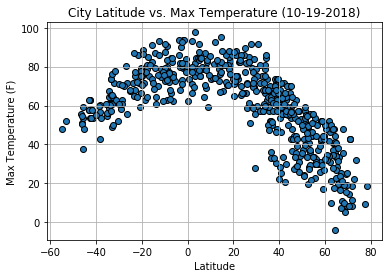

In [7]:
# Extracting today's date
tdate = datetime.datetime.today().strftime('%m-%d-%Y')

# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Max Temperature ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Max Temp.png")

# Displaying the graph
plt.show()

#### Latitude vs. Humidity Plot

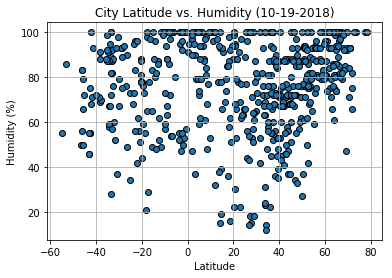

In [8]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Humidity ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Humidity.png")

# Displaying the graph
plt.show()

#### Latitude vs. Cloudiness Plot

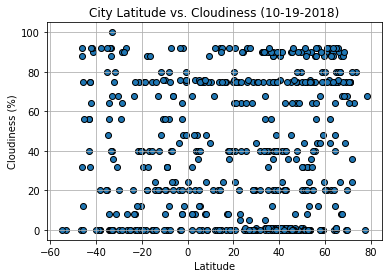

In [9]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Cloudiness ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Cloudiness.png")

# Displaying the graph
plt.show()

#### Latitude vs. Wind Speed Plot

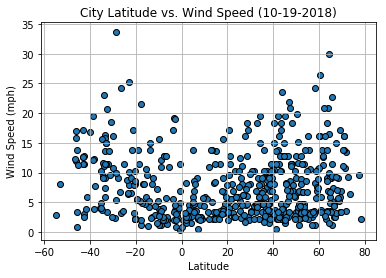

In [10]:
# Making a scattered plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black",)

# Creating titles and axis labels
plt.title(f"City Latitude vs. Wind Speed ({tdate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Saving the plotted figures as .png
plt.savefig("City Latitude VS Wind Speed.png")

# Displaying the graph
plt.show()